# MLP(Multi Layer Perceptron) 설계하기
CIFAR-10 데이터로 다중 레이어 신경망 설계

In [1]:
# 모듈 임포트
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

# 딥러닝시 장비 확인(cpu 사용)
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else :
    DEVICE = torch.device('cpu')
    
BATCH_SIZE = 32
EPOCHS = 10

In [2]:
train_dataset = datasets.CIFAR10(root='./data/CIFAR_10', train=True, download=True, transform = transforms.ToTensor())
test_dataset = datasets.CIFAR10(root='./data/CIFAR_10', train=False, transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/CIFAR_10\cifar-10-python.tar.gz to ./data/CIFAR_10


In [3]:
# 데이터 확인
for(X_train, y_train) in train_loader:
    print('X_train : ', X_train.size(), 'type : ', X_train.type())
    print('y_train : ', y_train.size(), 'type : ', y_train.type())
    break
    # 가로 32, 세로 32의 컬러(Red, Green, Blue) 이미지 32이개 하나의 미니 배치를 구성

X_train :  torch.Size([32, 3, 32, 32]) type :  torch.FloatTensor
y_train :  torch.Size([32]) type :  torch.LongTensor


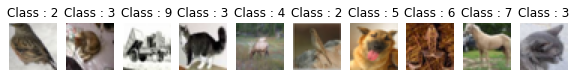

In [4]:
# 이미지 출력
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.axis('off')
    plt.imshow(np.transpose(X_train[i], (1, 2, 0)))
    plt.title('Class : ' + str(y_train[i].item()))

In [ ]:
# MLP 모델 생성
class Net(nn.Moduele)